# Save growth rate figures

This notebook is used to save the growht rate figures and plot the scatterplot down below.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc


In [3]:
# Load the CSV into a DataFrame
df_control = pd.read_csv("Size_Control.csv", index_col="Timestep")
df_DS = pd.read_csv("DeltaSize.csv", index_col="Timestep")
df_DS['Control'] = df_control['Control_size'].values
df_DS


,trim10,trim20,trim30,trim40,trim50,trim0_5,trim1_0,trim2_0,trim5_0,trim10_0,...,trimG1,trimB1,trimB2,trimB3,trimB4,trimL1,trimL2,trimL3,trimL4,Control
Timestep,,,,,,,,,,,,,,,,,,,,,
0,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,...,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07,2.102994e+07
1,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,...,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.103754e+07,2.102994e+07
2,2.107044e+07,2.107044e+07,2.107044e+07,2.107044e+07,2.107044e+07,2.105899e+07,2.107044e+07,2.106098e+07,2.106549e+07,2.106667e+07,...,2.107920e+07,2.107044e+07,2.107390e+07,2.106610e+07,2.105924e+07,2.107044e+07,2.106568e+07,2.106836e+07,2.105899e+07,2.104496e+07
3,2.108935e+07,2.108935e+07,2.108935e+07,2.108935e+07,2.108935e+07,2.109054e+07,2.108935e+07,2.109990e+07,2.109177e+07,2.108878e+07,...,2.108320e+07,2.108935e+07,2.108635e+07,2.111038e+07,2.109318e+07,2.108935e+07,2.107625e+07,2.110525e+07,2.108402e+07,2.109557e+07
4,2.112200e+07,2.112200e+07,2.112200e+07,2.112200e+07,2.112200e+07,2.111456e+07,2.112200e+07,2.109214e+07,2.108337e+07,2.115028e+07,...,2.111978e+07,2.112200e+07,2.109170e+07,2.110590e+07,2.110274e+07,2.112200e+07,2.110105e+07,2.110875e+07,2.113277e+07,2.113147e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.301103e+07,2.312406e+07,2.385775e+07,2.320679e+07,2.351468e+07,2.324950e+07,2.301103e+07,2.314266e+07,2.342117e+07,2.252399e+07,...,2.268076e+07,2.301103e+07,2.327823e+07,2.388405e+07,2.337192e+07,2.301103e+07,2.368167e+07,2.369672e+07,2.286193e+07,2.341177e+07
89,2.304519e+07,2.316689e+07,2.386311e+07,2.321485e+07,2.354410e+07,2.328787e+07,2.304519e+07,2.313912e+07,2.343146e+07,2.254204e+07,...,2.268868e+07,2.304519e+07,2.330017e+07,2.390487e+07,2.340418e+07,2.304519e+07,2.368849e+07,2.371248e+07,2.294467e+07,2.341656e+07
90,2.306842e+07,2.320233e+07,2.387268e+07,2.320517e+07,2.355219e+07,2.328310e+07,2.306842e+07,2.315517e+07,2.344162e+07,2.259259e+07,...,2.270469e+07,2.306842e+07,2.329793e+07,2.390901e+07,2.344188e+07,2.306842e+07,2.372506e+07,2.375252e+07,2.297891e+07,2.350720e+07


#### Interpolate & calculate the procentual change

to get target years

In [5]:
years_full = np.linspace(0, 100, num=93)
df_DS.index = years_full                # make index in morph years
target_years = np.arange(0, 101, 10)    # make the 10 year list [0, 10, 20]

# Interpolate each column independently
df_interp = pd.DataFrame(index=target_years)
 
for col in df_DS.columns:               # use scipy to use all 93 data to interpolate
    f = sc.interpolate.interp1d(df_DS.index, df_DS[col], kind='linear', fill_value="extrapolate") 
    df_interp[col] = f(target_years)       

growth_rates = df_interp.diff().dropna()

# Step 5: Add year interval labels
growth_rates['year_interval'] = [f"{target_years[i-1]}–{target_years[i]}" for i in range(1, len(target_years))]

growth_rates.set_index('year_interval', inplace=True)
growth_rates

,trim10,trim20,trim30,trim40,trim50,trim0_5,trim1_0,trim2_0,trim5_0,trim10_0,...,trimG1,trimB1,trimB2,trimB3,trimB4,trimL1,trimL2,trimL3,trimL4,Control
year_interval,,,,,,,,,,,,,,,,,,,,,
0–10,222688.954597,222688.954597,222688.954597,222688.954597,222688.954597,147988.356454,222688.954597,241008.823211,190633.530622,143016.868346,...,213828.599841,222688.954597,159771.879038,170316.633022,233722.308325,222688.954597,201099.870575,197068.453066,185434.566739,122330.628474
10–20,51951.690647,69379.580884,69379.580884,69379.580884,69379.580884,201633.046812,51951.690647,37141.324706,271138.235441,311798.358367,...,8951.017124,51951.690647,63465.167566,128562.266164,382119.304156,51951.690647,138044.681506,75026.240476,96342.425279,249456.072099
20–30,188282.989558,305599.367470,214375.773299,214375.773299,214375.773299,174471.640042,188282.989558,72535.645274,193524.932362,215867.160094,...,224760.102772,188282.989558,340874.385798,198168.705280,497779.673350,188282.989558,181193.398781,297662.322027,126105.243160,360858.694516
30–40,266248.475880,282856.903175,241815.978498,341732.358522,341732.358522,254591.214649,266248.475880,389964.008365,473851.347522,93080.499336,...,325612.574961,266248.475880,351901.924757,200966.414374,339057.352592,266248.475880,104478.808182,391314.982109,346150.895049,134769.884398
40–50,360924.898266,232043.116739,560161.594404,253798.378721,326879.649105,220391.730814,360924.898266,528128.644019,278077.722829,41489.887699,...,64037.781526,360924.898266,334515.237356,337248.912513,227138.622445,360924.898266,535155.798724,390822.613434,215436.889231,195609.939852
50–60,219260.596279,249515.135227,512270.095185,185713.858297,236102.324131,214454.777190,219260.596279,357394.670760,369506.961475,493282.769795,...,171315.417649,219260.596279,402405.777587,735066.400159,163542.862136,219260.596279,332183.459571,203606.305298,175275.296881,583929.640456
60–70,244121.117228,278643.092753,536000.002084,145921.323116,224826.060036,490717.425992,244121.117228,181646.917182,131164.823761,17503.810531,...,229644.365409,244121.117228,151336.762537,92546.180309,118736.199627,244121.117228,229041.672131,273663.655036,240582.260808,180518.884117
70–80,225132.180941,73904.944615,322389.145434,342746.174684,165691.066353,215286.522403,225132.180941,181884.121140,104770.495073,54004.972596,...,182671.836244,225132.180941,177927.409061,250187.677743,130758.529814,225132.180941,363678.337656,361434.786433,152840.031308,186938.354434
80–90,145479.956427,239273.391520,107696.497406,243148.827338,606506.936086,147193.452220,145479.956427,85622.604548,256549.600678,58160.536980,...,193030.303942,145479.956427,176799.519820,496658.010103,209314.432892,145479.956427,185696.240465,354438.286895,92423.576729,299767.611943


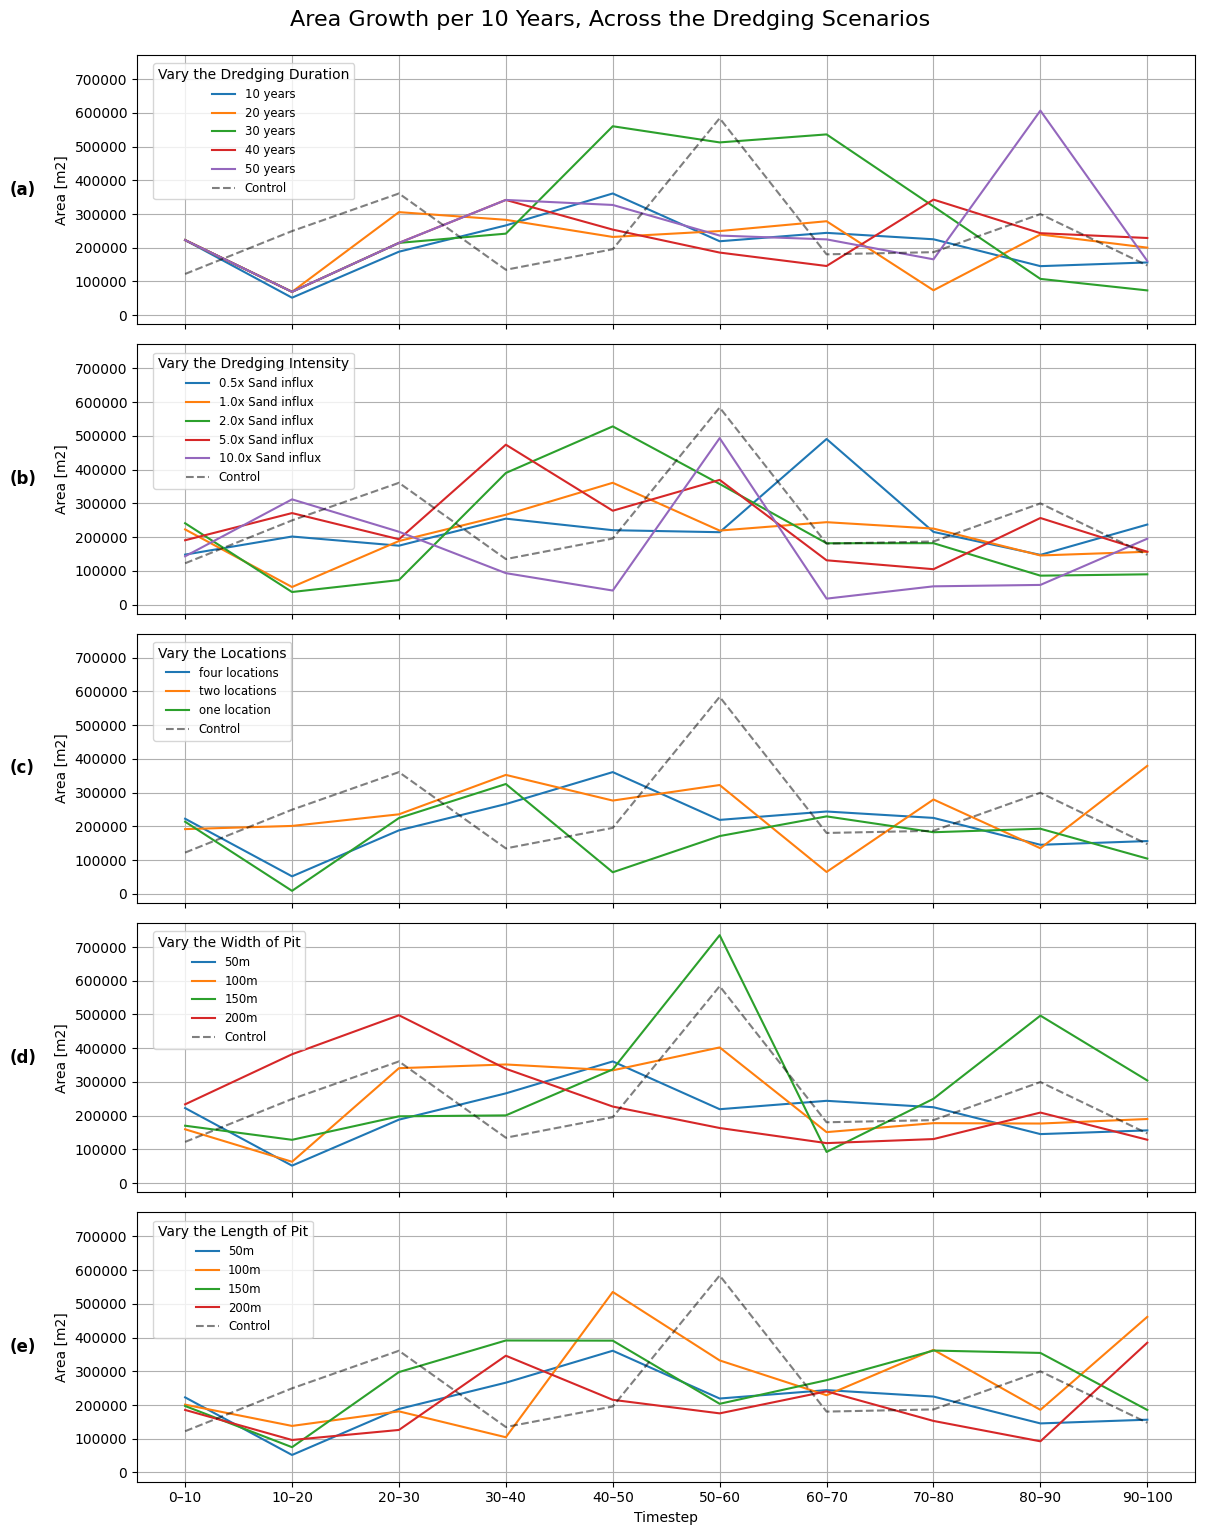

In [6]:
# Control trace
trimC = growth_rates['Control'] 

# Column groups
groups = {
    'Dredging Duration': [col for col in growth_rates.columns if "trim" in col and "_" not in col and not any(c in col for c in "GBL")],
    'Dredging Intensity': [col for col in growth_rates.columns if "trim0" in col or "trim1_0" in col or "trim2_0" in col or "trim5_0" in col or "trim10_0" in col],
    'Locations': [col for col in growth_rates.columns if "trimG" in col],
    'Width of Pit': [col for col in growth_rates.columns if "trimB" in col],
    'Length of Pit': [col for col in growth_rates.columns if "trimL" in col]
}

# Explicit label mapping for each column
label_dict = {
    'trim10': '10 years', 'trim20': '20 years', 'trim30': '30 years', 'trim40': '40 years', 'trim50': '50 years',
    'trim0_5': '0.5x Sand influx', 'trim1_0': '1.0x Sand influx', 'trim2_0': '2.0x Sand influx', 
    'trim5_0': '5.0x Sand influx', 'trim10_0': '10.0x Sand influx',
    'trimG4': 'four locations', 'trimG2': 'two locations', 'trimG1': 'one location',
    'trimB1': '50m', 'trimB2': '100m', 'trimB3': '150m', 'trimB4': '200m',
    'trimL1': '50m', 'trimL2': '100m', 'trimL3': '150m', 'trimL4': '200m'
}

import string

fig, axes = plt.subplots(5, 1, figsize=(12, 15), sharey=True, sharex=True)
subplot_labels = list(string.ascii_lowercase)

for i, (ax, (group_name, columns)) in enumerate(zip(axes, groups.items())):
    for col in columns:
        label = label_dict.get(col, col)
        ax.plot(growth_rates.index, growth_rates[col], label=label)
    ax.plot(growth_rates.index, trimC, label='Control', color='black', linestyle='--', alpha=0.5)
    
    # Remove previous ylabel with labels; add text to left, centered vertically
    label_text = f"({subplot_labels[i]})"
    ax.text(-0.12, 0.5, label_text, transform=ax.transAxes,
            fontsize=12, fontweight='bold', va='center', ha='left')
    
    ax.set_ylabel("Area [m2]")
    ax.grid()
    ax.legend(title=f'Vary the {group_name}', fontsize="small", loc='upper left', bbox_to_anchor=(0.01, 0.99))

axes[-1].set_xlabel("Timestep")

plt.tight_layout()
plt.suptitle("Area Growth per 10 Years, Across the Dredging Scenarios", fontsize=16, y=1.02)
plt.savefig("C:/Users/camup/Documents/aaMEE/Master thesis/figures/GR_timesteps_ALL.png", bbox_inches='tight', dpi=400)
plt.show()


## Data processing

In [8]:
# plot latest size in scatter plot
df = df_DS.iloc[-1]
df_last = df.reset_index()
df_last.columns = ['trimID', 'last_value']

dredging_duration = 10
width_pit = 50
length_pit = 50
dredging_intensity = 1
grouped = 4 

growthrate1 = growth_rates.iloc[0].values
growthrate2 = growth_rates.iloc[1].values
growthrate3 = growth_rates.iloc[2].values
growthrate4 = growth_rates.iloc[3].values

df_last['dredging_duration'] = dredging_duration
df_last['width_pit'] = width_pit
df_last['length_pit'] = length_pit
df_last['dredging_intensity'] = dredging_intensity
df_last['grouped'] = grouped

df_last['growthrate1'] = growthrate1
df_last['growthrate2'] = growthrate2
df_last['growthrate3'] = growthrate3
df_last['growthrate4'] = growthrate4


df_last['norm_growth1'] = growthrate1 / growthrate1[-1]
df_last['norm_growth2'] = growthrate2 / growthrate2[-1]
# df_last['norm_growth1'] = growthrate1 / growthrate1[-1]
# df_last['norm_growth2'] = growthrate2 / growthrate2[-1]


# df_last

In [9]:
# Suppose you want to set a different duration for these IDs:
adjustments = {
    'trim10': 10,
    'trim20': 20,
    'trim30': 30,
    'trim40': 40,
    'trim50': 50,
}

# Update the 'dredging_duration' column based on trimID
for trim_id, new_duration in adjustments.items():
    df_last.loc[df_last['trimID'] == trim_id, 'dredging_duration'] = new_duration

In [10]:
# adjust hehehe
df_last.loc[df_last['trimID'] == 'trim0_5', 'dredging_intensity'] = 0.5
df_last.loc[df_last['trimID'] == 'trim2_0', 'dredging_intensity'] = 2
df_last.loc[df_last['trimID'] == 'trim5_0', 'dredging_intensity'] = 5
df_last.loc[df_last['trimID'] == 'trim10_0', 'dredging_intensity'] = 10

df_last.loc[df_last['trimID'] == 'trimG2', 'grouped'] = 2
df_last.loc[df_last['trimID'] == 'trimG1', 'grouped'] = 1

df_last.loc[df_last['trimID'] == 'trimG2', 'length_pit'] = 50
df_last.loc[df_last['trimID'] == 'trimG1', 'length_pit'] = 100

df_last.loc[df_last['trimID'] == 'trimG2', 'width_pit'] = 100
df_last.loc[df_last['trimID'] == 'trimG1', 'width_pit'] = 100


df_last.loc[df_last['trimID'] == 'trimB2', 'width_pit'] = 100
df_last.loc[df_last['trimID'] == 'trimB3', 'width_pit'] = 150
df_last.loc[df_last['trimID'] == 'trimB4', 'width_pit'] = 200

df_last.loc[df_last['trimID'] == 'trimL2', 'length_pit'] = 100
df_last.loc[df_last['trimID'] == 'trimL3', 'length_pit'] = 150
df_last.loc[df_last['trimID'] == 'trimL4', 'length_pit'] = 200

df_last.loc[df_last['trimID'] == 'Control', 'length_pit'] = 0
df_last.loc[df_last['trimID'] == 'Control', 'width_pit'] = 0
df_last.loc[df_last['trimID'] == 'Control', 'dredging_intensity'] = 0
df_last.loc[df_last['trimID'] == 'Control', 'grouped'] = 0
df_last.loc[df_last['trimID'] == 'Control', 'dredging_duration'] = 0

df_last['area_pit'] = df_last['width_pit'] * df_last['length_pit']

# df_last

C:\Users\camup\AppData\Local\Temp\ipykernel_10152\4054897802.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_last.loc[df_last['trimID'] == 'trim0_5', 'dredging_intensity'] = 0.5


In [11]:
# # List of trimIDs to exclude
# excluded_trimIDs = ['trim1_0', 'trimG4', 'trimL1', 'trimB1']

# # Create new DataFrame without the excluded trimIDs
# df_data = df_last[~df_last['trimID'].isin(excluded_trimIDs)]
# # df_data
df_data = df_last

In [12]:
# # Function to map trimID to group
# def get_group(trim_id):
#     if trim_id.startswith('trimG'):
#         return 'Grouped Varied'
#     elif trim_id.startswith('trimB'):
#         return 'Width Varied'
#     elif trim_id.startswith('trimL'):
#         return 'Length Varied'
#     elif trim_id.startswith('trim0_') or trim_id.startswith('trim1_') or trim_id.startswith('trim2_') or trim_id.startswith('trim5_') or trim_id.startswith('trim10_'):
#         return 'Intensity Varied'
#     elif trim_id.startswith('Control'):
#         return 'Control'
#     else:
#         return 'Duration Varied'

# # Add a group column
# df_data['group'] = df_data['trimID'].apply(get_group)

# # Define axes
# x_columns = ['dredging_duration', 'width_pit', 'length_pit', 'dredging_intensity', 'grouped', 'growthrate1']
# y_column = 'last_value'
# x_titles = ['Years Dredged', 'Width Pit [m]', 'Length Pit [m]', 'Dredging Intensity [x sed inflow]', 'Number of Pits', 'Size Pits [m²]']


# group_styles = {
#     'Duration Varied': {'color': 'C0', 'marker': 'o'},
#     'Intensity Varied': {'color': 'C1', 'marker': 's'},
#     'Grouped Varied': {'color': 'C2', 'marker': 'D'},
#     'Width Varied': {'color': 'C3', 'marker': '^'},
#     'Length Varied': {'color': 'C4', 'marker': 'v'},
#     'Control': {'color': 'black', 'marker': 'X'},
# }

# # Create subplots
# fig, axs = plt.subplots(2, 3, figsize=(18, 10))
# axs = axs.flatten()

# # Plot all groups
# for i, x_col in enumerate(x_columns):
#     for group_name, style in group_styles.items():
#         subset = df_data[df_data['group'] == group_name]
#         axs[i].scatter(
#             subset[x_col],
#             subset[y_column],
#             label=group_name,
#             color=style['color'],
#             marker=style['marker'],
#             s=80,
#             edgecolor='k',
#             alpha=0.8
#         )
#     axs[i].set_xlabel(x_titles[i])
#     axs[i].set_ylabel('Area [m2]')
#     axs[i].set_title(f'Final size vs {x_titles[i]}')
#     axs[i].grid(True)

# # Create a common legend
# # Get the first handles from one plot (order matches group_styles)
# handles = []
# labels = []
# for group_name, style in group_styles.items():
#     handles.append(plt.Line2D([], [], color=style['color'], marker=style['marker'],
#                               linestyle='', markersize=10, label=group_name, markeredgecolor='k'))
#     labels.append(group_name)

# fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=12, frameon=False)

# # Layout adjustments
# plt.tight_layout(rect=[0, 0, 1, 0.93])
# plt.show()


In [13]:
# normalise over control
df_data['norm_last_value'] = df_data['last_value'] / trimC.iloc[-1]

In [14]:
df_data

,trimID,last_value,dredging_duration,width_pit,length_pit,dredging_intensity,grouped,growthrate1,growthrate2,growthrate3,growthrate4,norm_growth1,norm_growth2,area_pit,norm_last_value
0,trim10,2.311051e+07,10,50,50,1.0,4,222688.954597,51951.690647,188282.989558,266248.475880,1.820386,0.208260,2500,156.740042
1,trim20,2.318414e+07,20,50,50,1.0,4,222688.954597,69379.580884,305599.367470,282856.903175,1.820386,0.278123,2500,157.239440
2,trim30,2.389028e+07,30,50,50,1.0,4,222688.954597,69379.580884,214375.773299,241815.978498,1.820386,0.278123,2500,162.028626
3,trim40,2.327840e+07,40,50,50,1.0,4,222688.954597,69379.580884,214375.773299,341732.358522,1.820386,0.278123,2500,157.878719
4,trim50,2.359900e+07,50,50,50,1.0,4,222688.954597,69379.580884,214375.773299,341732.358522,1.820386,0.278123,2500,160.053092
5,trim0_5,2.333381e+07,10,50,50,0.5,4,147988.356454,201633.046812,174471.640042,254591.214649,1.209741,0.808291,2500,158.254516
6,trim1_0,2.311051e+07,10,50,50,1.0,4,222688.954597,51951.690647,188282.989558,266248.475880,1.820386,0.208260,2500,156.740042
7,trim2_0,2.319484e+07,10,50,50,2.0,4,241008.823211,37141.324706,72535.645274,389964.008365,1.970143,0.148889,2500,157.311959
8,trim5_0,2.345559e+07,10,50,50,5.0,4,190633.530622,271138.235441,193524.932362,473851.347522,1.558347,1.086918,2500,159.080421
9,trim10_0,2.265334e+07,10,50,50,10.0,4,143016.868346,311798.358367,215867.160094,93080.499336,1.169101,1.249913,2500,153.639437


## Plot Data in Scatter Plots

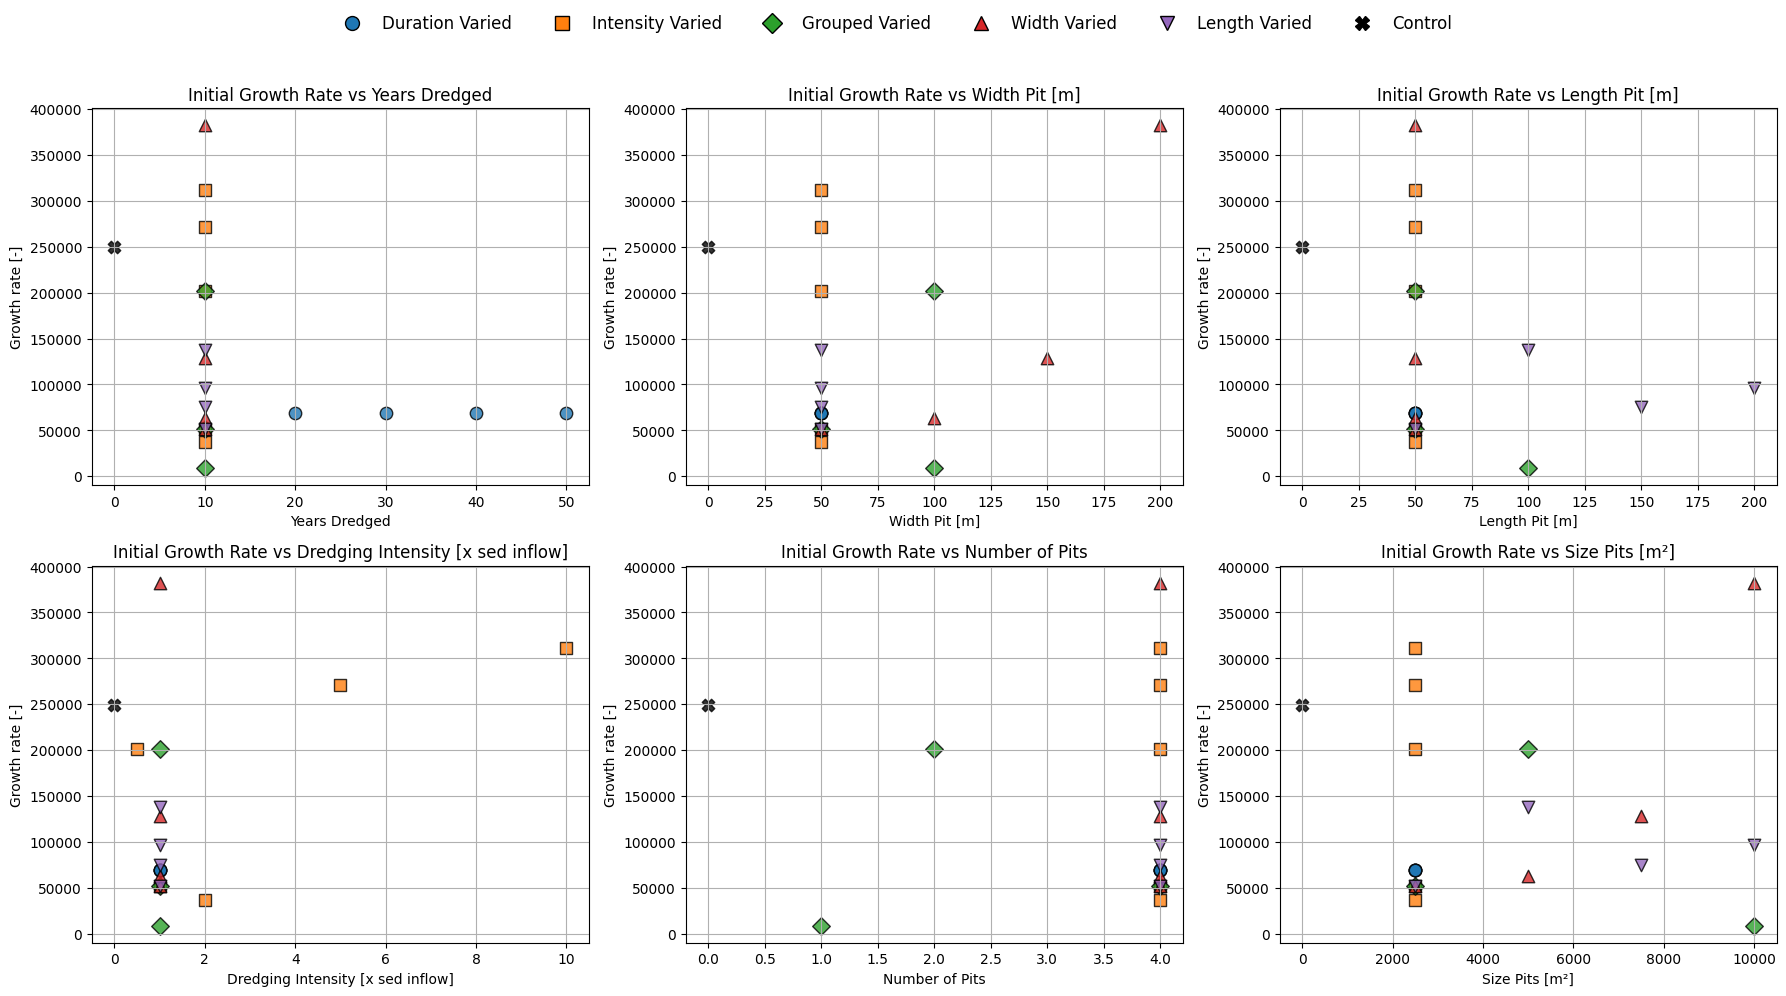

In [16]:
# Function to map trimID to group
def get_group(trim_id):
    if trim_id.startswith('trimG'):
        return 'Grouped Varied'
    elif trim_id.startswith('trimB'):
        return 'Width Varied'
    elif trim_id.startswith('trimL'):
        return 'Length Varied'
    elif trim_id.startswith('trim0_') or trim_id.startswith('trim1_') or trim_id.startswith('trim2_') or trim_id.startswith('trim5_') or trim_id.startswith('trim10_'):
        return 'Intensity Varied'
    elif trim_id.startswith('Control'):
        return 'Control'
    else:
        return 'Duration Varied'

# Add a group column
df_data['group'] = df_data['trimID'].apply(get_group)

# Define axes
x_columns = ['dredging_duration', 'width_pit', 'length_pit', 'dredging_intensity', 'grouped', 'area_pit']
y_column = 'growthrate2'
x_titles = ['Years Dredged', 'Width Pit [m]', 'Length Pit [m]', 'Dredging Intensity [x sed inflow]', 'Number of Pits', 'Size Pits [m²]']


group_styles = {
    'Duration Varied': {'color': 'C0', 'marker': 'o'},
    'Intensity Varied': {'color': 'C1', 'marker': 's'},
    'Grouped Varied': {'color': 'C2', 'marker': 'D'},
    'Width Varied': {'color': 'C3', 'marker': '^'},
    'Length Varied': {'color': 'C4', 'marker': 'v'},
    'Control': {'color': 'black', 'marker': 'X'},
}

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

# Plot all groups
for i, x_col in enumerate(x_columns):
    for group_name, style in group_styles.items():
        subset = df_data[df_data['group'] == group_name]
        axs[i].scatter(
            subset[x_col],
            subset[y_column],
            label=group_name,
            color=style['color'],
            marker=style['marker'],
            s=80,
            edgecolor='k',
            alpha=0.8
        )
    axs[i].set_xlabel(x_titles[i])
    axs[i].set_ylabel('Growth rate [-]')
    axs[i].set_title(f'Initial Growth Rate vs {x_titles[i]}')
    axs[i].grid(True)

# Create a common legend
# Get the first handles from one plot (order matches group_styles)
handles = []
labels = []
for group_name, style in group_styles.items():
    handles.append(plt.Line2D([], [], color=style['color'], marker=style['marker'],
                              linestyle='', markersize=10, label=group_name, markeredgecolor='k'))
    labels.append(group_name)

fig.legend(handles, labels, loc='upper center', ncol=6, fontsize=12, frameon=False)

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.93])
# plt.savefig('C:/Users/camup/Documents/aaMEE/Master thesis/figures/GrowthRate2fractionVsVariable.png')

plt.show()


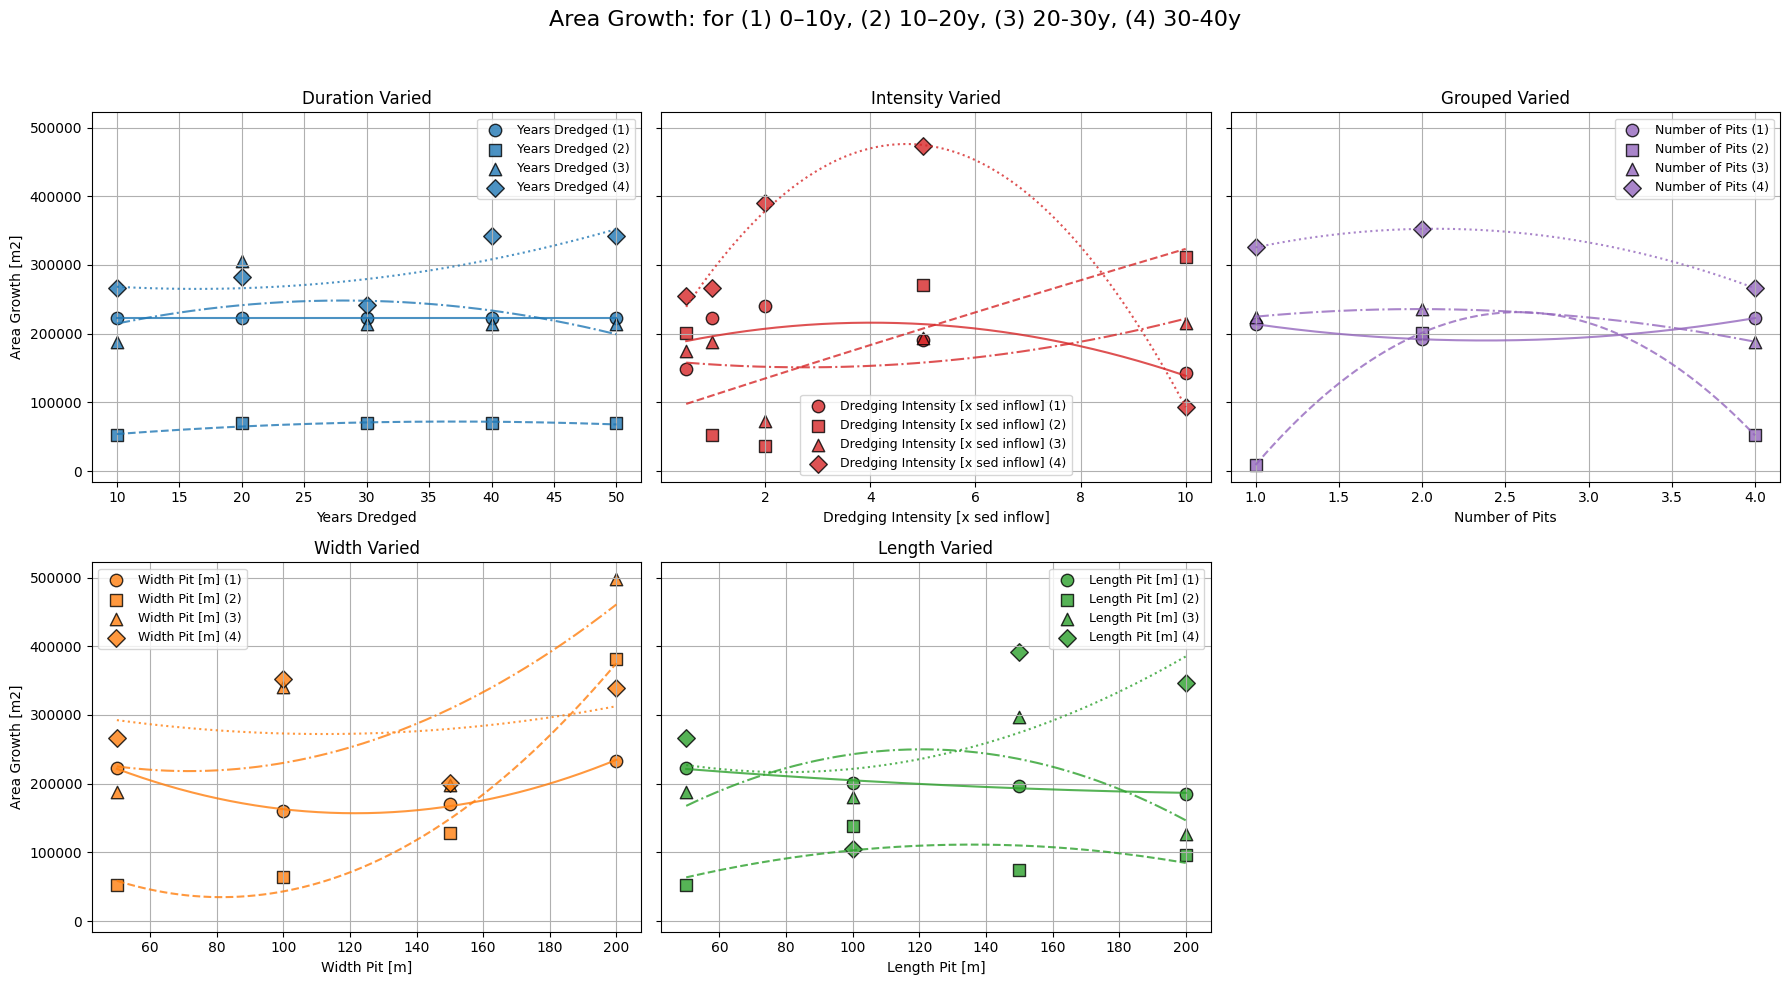

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# cmap = get_cmap('YlOrRd', len(y_columns))  # or 'plasma', 'cividis', etc.

# Make sure 'group' column exists
df_data['group'] = df_data['trimID'].apply(get_group)

# Define varied variable(s) per group
group_to_xcols = {
    'Duration Varied': ['dredging_duration'],
    'Intensity Varied': ['dredging_intensity'],
    'Grouped Varied': ['grouped'],
    'Width Varied': ['width_pit'],
    'Length Varied': ['length_pit'],
}

# Styles for variables
x_styles = {
    'dredging_duration': {'color1': 'C0', 'color2': 'C0', 'marker': 'o'},
    'width_pit': {'color1': 'C1', 'color2': 'C1', 'marker': 's'},
    'length_pit': {'color1': 'C2', 'color2': 'C2', 'marker': '^'},
    'dredging_intensity': {'color1': 'C3', 'color2': 'C3', 'marker': 'D'},
    'grouped': {'color1': 'C4', 'color2': 'C4', 'marker': 'v'},
}

# Axis labels
x_titles = {
    'dredging_duration': 'Years Dredged',
    'width_pit': 'Width Pit [m]',
    'length_pit': 'Length Pit [m]',
    'dredging_intensity': 'Dredging Intensity [x sed inflow]',
    'grouped': 'Number of Pits',
}

# Plotting both growthrate1 and growthrate2
y_columns = [
    ('growthrate1', 'solid', 'o'),
    ('growthrate2', 'dashed', 's'),
    ('growthrate3', 'dashdot', '^'),
    ('growthrate4', 'dotted', 'D'),
]

group_names = list(group_to_xcols.keys())

fig, axs = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axs = axs.flatten()

for i, group_name in enumerate(group_names):
    ax = axs[i]
    subset = df_data[df_data['group'] == group_name]
    varied_xcols = group_to_xcols[group_name]

    if not varied_xcols:
        ax.text(0.5, 0.5, 'No variables varied', ha='center', va='center', fontsize=12)
        ax.set_title(group_name)
        ax.grid(True)
        continue

    for x_col in varied_xcols:
        style = x_styles[x_col]
        x = subset[x_col]
        for idx_y, (y_col, linestyle, year_marker) in enumerate(y_columns):
            y = subset[y_col]
            label = f"{x_titles[x_col]} ({y_col[-1]})"
        
            color = style['color1']
            alpha = 0.8
            marker = year_marker
            
            # Scatter
            ax.scatter(
                x, y,
                label=label,
                color=color,
                marker=marker,
                s=80,
                edgecolor='k',
                alpha=alpha
            )
        
            # Fit curve
            if len(x) > 2:
                coeffs = np.polyfit(x, y, 2)
                x_fit = np.linspace(x.min(), x.max(), 200)
                y_fit = np.polyval(coeffs, x_fit)
                ax.plot(x_fit, y_fit, color=color, linestyle=linestyle, linewidth=1.5, alpha=alpha)

    ax.set_xlabel(x_titles[varied_xcols[0]])
    ax.set_title(group_name)
    ax.grid(True)
    ax.legend(fontsize=9)

# Shared Y-axis label
for ax in axs[::3]:
    ax.set_ylabel('Area Growth [m2]')

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.suptitle("Area Growth: for (1) 0–10y, (2) 10–20y, (3) 20-30y, (4) 30-40y", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("C:/Users/camup/Documents/aaMEE/Master thesis/figures/FractionalgrowthBothPeriods.png", bbox_inches='tight', dpi=400)
plt.show()


C:\Users\camup\AppData\Local\Temp\ipykernel_10152\1886236594.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


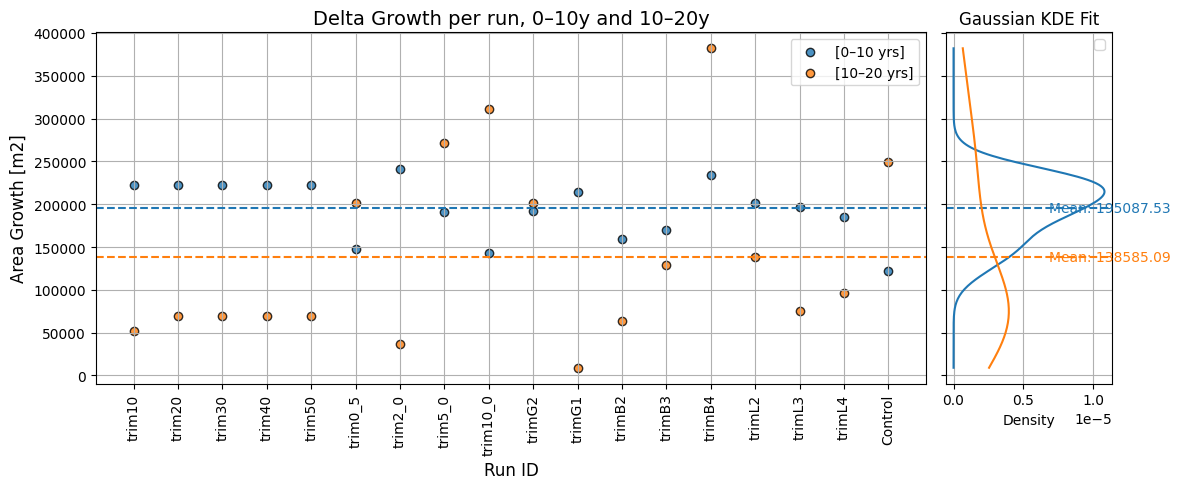

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


# List of trimIDs to exclude
excluded_trimIDs = ['trim1_0', 'trimG4', 'trimL1', 'trimB1']

# Create new DataFrame without the excluded trimIDs
df_data = df_last[~df_last['trimID'].isin(excluded_trimIDs)]


fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [5, 1]}, sharey=True)

# --- Scatter plot ---
axs[0].scatter(df_data['trimID'], df_data['growthrate1'], edgecolors='k', label='[0–10 yrs]', alpha=0.8)
axs[0].scatter(df_data['trimID'], df_data['growthrate2'], edgecolors='k', label='[10–20 yrs]', alpha=0.8)

axs[0].set_xlabel('Run ID', fontsize=12)
axs[0].set_ylabel('Area Growth [m2]', fontsize=12)
axs[0].set_title('Delta Growth per run, 0–10y and 10–20y', fontsize=14)
axs[0].legend()
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)

# --- KDE Fit Plot ---
colors = ['C0', 'C1']
labels = ['[0–10 yrs]', '[10–20 yrs]']
for growth_data, color, label in zip([df_data['growthrate1'], df_data['growthrate2']], colors, labels):
    kde = gaussian_kde(growth_data)
    y_vals = np.linspace(df_data[['growthrate1', 'growthrate2']].min().min(), 
                         df_data[['growthrate1', 'growthrate2']].max().max(), 200)
    x_vals = kde(y_vals)
    axs[1].plot(x_vals, y_vals, color=color, linewidth=1.5)
    
    # Mean line
    mean_val = growth_data.mean()
    axs[1].axhline(mean_val, color=color, linestyle='--', linewidth=1.5)
    axs[0].axhline(mean_val, color=color, linestyle='--', linewidth=1.5)
    axs[1].text(axs[1].get_xlim()[1]*0.6, mean_val, f'Mean: {mean_val:.2f}', va='center', ha='left', color=color, fontsize=10)
axs[1].set_title('Gaussian KDE Fit', fontsize=12)
axs[1].set_xlabel('Density')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("C:/Users/camup/Documents/aaMEE/Master thesis/figures/FractionalgrowthCompareYears.png", bbox_inches='tight', dpi=400)
plt.show()
